<B><font size="6">Homework 5 </B></font>

Given Huber-hinge loss or smooth hinge loss as:

$$\begin{align} l_{huber-hinge}(y,t) :=\space\space\space\space\space\space\space\space\space\space\space\space\  0 \space\space\space\space\space\space\space\space\space\space\space\space\space if \space\space\space\space\space\space yt>1+h \\
\space\space\space\space\space\space\space\space\frac{(1+h-yt)^2}{4h}\space\space\space\space\space\space\space if \space\space 1-yt<=1+h \\
\space\space\space\space\space{1-yt}\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space if \space\space yt<=1-h
\end{align}$$

Here, h is a parameter to set and between 0.01 and 0.5.

As depicted by the above code, hinge-loss gives a convex upper bound for misclassification error loss and huber-hinge loss gives a differentiable,convex and smooth upper bound (very tight) for misclassification error loss.

Now, to prove huber-hinge loss is differentiable, we'll show that all 3 components of the above equation are differentiable.
As we know t is the dot product of x and w. We need to find the differential w.r.t w.
That is, f'(w).
Taking first part where yt > 1+h , we have 0. So the differntial is 0.
so we replace t with xw and compute differentials w.r.t w.
Now, taking second part i.e.  yt < 1 -h , when we take out differential of the function (1-yxw) we get -yx.
Now, taking the last part when  |1-yt| ≤ h, when we take out differential of function (1+h-yxw)^2/4h we get -2xy(1+h -xyw)/4h = 
-xy(1-xyw+h)/2h
Let us take point when yt tends to 1 + h(i.e. yt -> 1+h)

Now Left hand side and substituting yt = 1+h i.e. $$\lim_{yt\to 1+h} \frac{(1+h-(1+h))^2}{4h}$$ i.e. 0

Now right hand side is already 0. Hence LHS = RHS. It is differentiable at point yt = 1+h

Taking the other point now when yt tends to 1 - h(i.e. yt -> 1-h)
Now taking Left hand side and substituting yt = 1-h i.e. $$\lim_{yt\to 1-h}{(1-(1-h))}$$ i.e. h
Now Left hand side and substituting yt = 1-h i.e. $$\lim_{yt\to 1-h} \frac{(1+h-(1-h))^2}{4h}\\
                                                                      =\frac{4(h)^2}{4h}\\
                                                                      =h$$
Again LHS = RHS, hence it is differentiable on this point as well.

Therefore, since it is differentiable on all its points. Hence the differentiability is proved.

We computed analytic expressions for the gradient above i.e. f'(w) for l_{huber-hinge}(y,t) := $$\space 0 \space if\space yt > 1 + h\\
                                                                                                  -xy \space if yt < 1 - h\\
                                                                                               \frac{-xy (1-xyw+h)}{2h}    if \space|1-yt| <= h$$

For Lipschitz continuous, a function is a-lipschitz if for every u,v ∈ C, we get |f(u)-f(v)| ≤ a |u−v|

Now we will use the equation of huber-hinge that we have i.e.

$$\begin{align} l_{huber-hinge}(y,t) :=\space\space\space\space\space\space\space\space\space\space\space\space\  0 \space\space\space\space\space\space\space\space\space\space\space\space\space if \space\space\space\space\space\space yt>1+h \\
\space\space\space\space\space\space\space\space\frac{(1+h-yt)^2}{4h}\space\space\space\space\space\space\space if \space\space 1-yt<=1+h \\
\space\space\space\space\space{1-yt}\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space if \space\space yt<=1-h
\end{align}$$

and now let us look at all 3 components seperately, first one is 0 and hence is lipschitz-continuous for a = 0
i.e. it is lipschitz-continuous for the first part.

Second part of huberized-hinge equation is quadratic and for it we are taking both instances i.e. yt = u and yt = v. Making the replacement in the equation we get the following:

$$ \begin{align} \parallel f(u) - f(v)  
=& \frac{ ((1+h)-u)^{2}}{4h} - \frac{ ((1+h)-v)^{2}}{4h} 
=& \frac{u^{2} - v^{2} -2(1+h)(u - v)}{4h} \\
=& \frac{-(1 - v)-(1 - u) - 2h}{4h}(u - v) 
=& \space a(u - v) \ \end{align} $$

the first part of the above equation is a constant and hence treated as a
The above statement proves that the quadratic equation in second part of huberized hinge is lipschitz-continuous for a

The third part of the equation deals with yt<=1 - h condition which is clearly a linear and hence lipschitz-continuous for a = 1
So, since it is proved for all 3 components. Hence, it is proved that Huber-hinge is lipschitz-continuous. 


C:\Anaconda\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


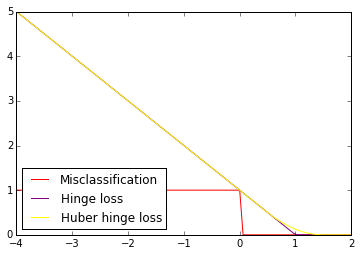

In [4]:
import matplotlib.pyplot as plt
%matplotlib nbagg
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler


samplespace = np.linspace(-4, 2, 100)
true_classify = np.where(samplespace > 0, 1, -1)
esti = np.ones(len(samplespace))
huber_condition = samplespace*esti
h = 0.499999
misclassify = true_classify !=esti
misclassify != esti
true_classify != esti
hinge = np.maximum(0, 1-(samplespace*esti))
huber_hinge = np.where( huber_condition > (1+h), 0, np.where(huber_condition < (1 - h), 1 - huber_condition, ((1 +  h - huber_condition)**2)/(4*h)))
plt.plot(samplespace, misclassify, label='Misclassification',color='red')
plt.plot(samplespace, hinge, label='Hinge loss', color='purple')
plt.plot(samplespace, huber_hinge, label='Huber hinge loss', color='yellow')
plt.legend(loc=3)
plt.show()

Compute grad prints
[ 3.88518455  2.11580491  2.17307246]
grad checker prints
(3.8851845460685652, 2.1158049128144896, 2.1730724640134369)
Output of my gradient descent


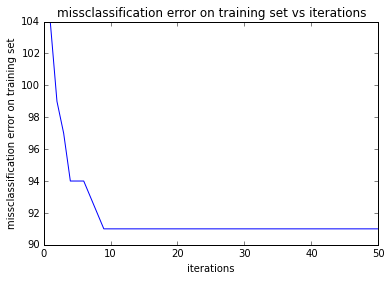

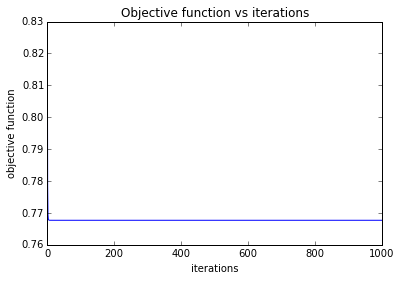

[  3.86971094e-01   1.62951579e-01   1.22409795e-04]


In [20]:
#Using Gradient calculation done above in markdown
def compute_grad(w,dataset,z):
    loss=0
    h=0.4
    C = 1
    for i in range(len(dataset)):
        x = dataset[i]
        yt = z[i]*np.dot(x,w)
        
        if(yt>1+h):
            loss=loss+ 0
        elif(yt<1-h):
            loss=loss-z[i]*x
        else:
            loss=loss-(z[i]*x*(1-yt+h))/(2*h)     
    val = (C*loss/len(dataset)) + 2*w
    return val

#Using Equation in Markdown above
def compute_obj(w,dataset,z):
    h=0.4
    loss=0
    C=1
    for i in range(len(dataset)):
        x = dataset[i]
        yt = z[i]*np.dot(x,w)
        if(yt>1+h):
            loss=loss+ 0
        elif(yt<1-h):
            loss=loss+(1-yt)
        else:
            loss=loss+((1+h-yt)**2)/(4*h)
    val2 = C*loss/len(dataset) + np.dot(w,w)
    return val2

#Checking gradient
def grad_checker(x,epsilon):
    a = compute_obj(w+epsilon*x,dataSet[0],dataSet[1])
    b = compute_obj(w-epsilon*x,dataSet[0],dataSet[1])
    val3 = (a - b)/(2*epsilon)
    #print('grad checker prints')
    #print(val3)
    return val3

#populating Gaussian
def Gauss():
    samples = 500
    C = 1
    maxiter = 1000
    d = 2
    np.random.seed(11112014)
    s = StandardScaler()
    C = np.array([[0., 0.07], [0.25, .89]])
    X = np.r_[np.dot(np.random.randn(samples, d), C),np.dot(np.random.randn(samples, d), C) + np.array([1, 1])]
    X_trans = s.fit_transform(X)
    y_trans = np.hstack((-np.ones(samples), np.ones(samples)))
    X_trans=np.column_stack([X_trans, np.ones([1000])])
    return X_trans, y_trans


#My Gradient Descent
def my_gradient_descent(dataset,z,e,maxiter=1000):
    Objective=[]
    MissClassification=[]
    w=np.zeros(3)
    for i in range(maxiter):
        w=w- e*compute_grad(w,dataset,z)
        MissClassification.append( (np.dot(dataset,w)*z<0).sum())
        Objective.append(compute_obj(w,dataset,z))
    plt.clf()
    plt.plot(range(maxiter),MissClassification)
    plt.title("missclassification error on training set vs iterations")
    plt.xlabel("iterations")
    plt.ylabel("missclassification error on training set")
    plt.xlim(0,50)
    plt.show() 
    plt.clf()
    plt.plot(range(maxiter),Objective)
    plt.title("Objective function vs iterations")
    plt.xlabel("iterations")
    plt.ylabel("objective function")
    plt.show()
    return w

dataSet = Gauss()
w=np.zeros(3)
w=np.array([2,1,1])
epsilon=10**-4
k=8
e = 0.1*(1.1)**k
print('Compute grad prints')
print compute_grad(w,dataSet[0],dataSet[1])
print('grad checker prints')
print(grad_checker(np.array([1,0,0]),epsilon),grad_checker(np.array([0,1,0]),epsilon),grad_checker(np.array([0,0,1]),epsilon))
print 'Output of my gradient descent'
print (my_gradient_descent(dataSet[0],dataSet[1],e))

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from timeit import Timer
from functools import partial
from memory_profiler import memory_usage
import timeit
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import MiniBatchKMeans

def onlineKmeans(dataSet,k=4,b=24,maxiter=1000):
    centroids = dataSet[Permutations(k,len(dataSet))]
    pointsPerClusters = np.zeros([k,1])
    for i in range(maxiter):
        M=dataSet[Permutations(b,len(dataSet))]
        distances = pairwise_distances(M, centroids, metric='euclidean')
        nearestCenters = np.argmin(distances, axis=1)
        for iter, x in enumerate(M):
            centerIndex = nearestCenters[iter]
            pointsPerClusters[centerIndex] = pointsPerClusters[centerIndex] + 1
            eta = 1/pointsPerClusters[centerIndex]
            centroids[centerIndex] = (1 - eta)*centroids[centerIndex] + eta * x
    return centroids

In [22]:
def Permutations(noElements,range):
    random_seed = 11112014
    rng = np.random.RandomState(random_seed)
    permutation = rng.permutation(range)
    return permutation[:noElements]

def profiler(function, *args, **kwargs):
    #print "args is ",args
    start_time = timeit.default_timer()
    memory, return_val = memory_usage((function, (args), kwargs), max_usage=True, retval=True)
    timeElapsed = timeit.default_timer() - start_time
    return memory[0], timeElapsed,return_val
iris = load_iris()
dataSet=iris.data
random_seed = 11112014
ranges = np.random.RandomState(random_seed)
permutation = ranges.permutation(len(dataSet))
dataSet=dataSet[permutation]

In [ ]:
mini=MiniBatchKMeans(n_clusters=4,max_iter=1000,batch_size=24)

In [ ]:
memory, time, rval = profiler(mini.fit,dataSet)
ourMemory,ourTime,ourCentroids= profiler(onlineKmeans, dataSet, k=4, b=24, maxiter=1000)

In [ ]:
inputSize= [[2**6, 24],[2**8, 24],[2**10, 24],[2**12, 24]]                    
scaler = StandardScaler()
plt.ion()
f1 = plt.figure()
ax1 = f1.add_subplot(111)
for num_samples, num_dimension in inputSize:
    X,y = make_blobs(n_samples=num_samples, n_features=num_dimension, centers=6)
    scaler.fit(dataSet)
    dataSet_scaled = scaler.transform(dataSet)
    ourMemory,ourTime,ourCentroids= profiler(onlineKmeans, dataSet, k=4, b=24, maxiter=1000)
    memory, time, rval = profiler(mini.fit,dataSet)
    plt.scatter(num_samples, memory,color="Green")
plt.show()

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import pandas
import math
import sys
import subprocess
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import vq
import urllib, urlparse
import os
from os import listdir
from os.path import isfile, join

def load():
    loc = 'C:/Anu';
    content = np.zeros((1,128)) 
    content = np.matrix(content)
    x = 0
    y = 0
    for a in listdir(loc):
        y = y + 1
        if y % 10  == 0:
            if isfile(join(loc,a)):
                with open(join(loc,a)) as b:
                    for li in b:
                        if not li.isspace():
                            des = map(float, li.split())                            
                            des = np.asarray(des)                          
                            descriptor = np.matrix(des)                           
                            descriptor = np.asarray(descriptor)                            
                            if x > 0:
                                content = np.concatenate((content,descriptor),axis=0)
                            else:
                                content[x,:] = descriptor                          
                            x += 1
    return content
    
def mykmeansplusplus (points,k,itr):
    data_x_shape = points.shape[0]
    index = np.random.randint(data_x_shape, size =1)
    initialCentroid = points[index]
    weight = np.zeros((points.shape[0]))
    index = np.zeros((points.shape[0]))

    for i in range(0,(k - 1)):
        Y= cdist(points, initialCentroid, metric='euclidean', p=2, V=None, VI=None, w=None)
        min_dist = np.amin(Y, axis=1) 
        min_center = np.argmin(Y, axis=1)
        min_dist_sum = np.sum(min_dist, axis=0)
        min_squared_dist_sum = np.sum(min_dist**2, axis=0)
        min_dist = min_dist**2
        min_dist_prob = min_dist / min_squared_dist_sum
        next_index = np.random.choice(points.shape[0],1,p=min_dist_prob)
        initial_clust_center = np.concatenate((initial_clust_center,points[next_index]),axis=0)
        
    initial_class = np.zeros((points.shape[0]))
    for j in range(0,max_iter):
        Z=tapoints, initial_clust_center, metric='euclidean', p=2, V=None, VI=None, w=None)
        target_dist = np.amin(Z, axis=1)  
        target_class = np.argmin(Z, axis=1)
        for i in range(0,n_cluster):
            values = points[target_class == i]
            initialCentroid[i,:] = np.mean(values, axis = 0)
        if np.array_equal(initial_class,target_class):
            break
        else:
            initial_class = target_class

    return initial_clust_center, target_class  
        

def createVocabulary(data,k,itr):
    clust_centers, labels = mykmeansplusplus(data,k,itr)
    return clust_centers

 def getvlad( clusters):
        binary_nn, distances = vq(clusters)
        vlad = np.zeros((3,128))
        for i in range(len(clusters)):
            clusters = clusters[i]
            nearest_cluster_index = binary_nn[i]
            nearest_cluster = self.clusters_centers[nearest_cluster_index]
            vlad[nearest_cluster_index] += clusters - nearest_cluster
        flat_vlad = vlad.reshape((self.descriptors_dimension*self.n_clusters,))
        print(flat_vlad)
        print('Vlad generated')
        return normalize(flat_vlad)

    
content = load()
#Normalise
content = preprocessing.scale(content,axis = 0, with_mean=True, with_std=True)
#Create Vocabulary with the images extracted
centroids = createVocabulary(content,10,100)
#Implement VLAD on the clusters generated 

centroids=getvlad(centroids)

approx_neighbors = lshf.kneighbors(centroids, return_distance=False)

Feedback:

1. 6-7 days.
2. Had to read SGD material(chap 14 in [2]) many a times for better understanding
3. I have developed a basic understanding of most things
4. More guidance about the project defense and types of questions to expect